# Lab 03 — Basics of Data (Solution Notebook)

This notebook implements the tasks from **Lab 03: Basics of Data (The Foundation of ML)**.

**Name: Muhammad Haadhee Sheeraz Mian**

**Reg no: 478359**

Sections:

- Load & explore Iris dataset
- Train/test split
- Titanic dataset preprocessing (missing values, outliers)
- Scaling and encoding
- Mini-challenge solutions



In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy import stats
import seaborn as sns
pd.set_option('display.max_columns', 50)


## 1) Iris dataset — load from CSV (iris.csv), explore, features/labels

In [2]:
# Load iris dataset from CSV (must be in same folder as this notebook)
df_iris = pd.read_csv("iris.csv")

print("Iris DataFrame shape:", df_iris.shape)
df_iris.head()

Iris DataFrame shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check column names
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Assume last column is species (adjust if needed)
# Exclude Id column from features
X = df_iris.iloc[:, 1:-1]  # Skip Id column (first) and Species column (last)
y = df_iris.iloc[:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)
display(X.head())
display(y.head())

X shape: (150, 4)
y shape: (150,)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [6]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

overlap = pd.merge(X_train.reset_index(drop=True), X_test.reset_index(drop=True), how='inner')
print("Overlap rows between train and test (should be 0):", overlap.shape[0])

X_train: (120, 4)
X_test : (30, 4)
y_train: (120,)
y_test : (30,)
Overlap rows between train and test (should be 0): 0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
overlap = pd.merge(X_train.reset_index(drop=True), X_test.reset_index(drop=True), how='inner')
print('Overlap rows:', overlap.shape[0])

(120, 4) (30, 4) (120,) (30,)
Overlap rows: 0


## 2) Titanic — missing values & outliers

In [8]:
titanic = sns.load_dataset('titanic')
print('Titanic shape:', titanic.shape)
titanic.head()

Titanic shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# Missing value counts
titanic.isnull().sum().sort_values(ascending=False).head(12)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
dtype: int64

In [10]:
# Handle missing values (numerical -> median, categorical -> mode)
titanic_clean = titanic.copy()
for col in ['age','fare']:
    if col in titanic_clean.columns:
        titanic_clean[col] = titanic_clean[col].fillna(titanic_clean[col].median())
for col in ['embarked','sex']:
    if col in titanic_clean.columns:
        titanic_clean[col] = titanic_clean[col].fillna(titanic_clean[col].mode()[0])
titanic_clean.isnull().sum().head(10)

C:\Users\haadh\AppData\Local\Temp\ipykernel_28192\2981386868.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean[col].fillna(titanic_clean[col].median(), inplace=True)
C:\Users\haadh\AppData\Local\Temp\ipykernel_28192\2981386868.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
dtype: int64

In [11]:
# Outliers detection on 'age'
age_z = stats.zscore(titanic_clean['age'].astype(float))
outliers_z = titanic_clean[np.abs(age_z) > 3]
print('Outliers (Z-score):', outliers_z.shape[0])
Q1 = titanic_clean['age'].quantile(0.25); Q3 = titanic_clean['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR; upper = Q3 + 1.5*IQR
outliers_iqr = titanic_clean[(titanic_clean['age'] < lower) | (titanic_clean['age'] > upper)]
print('Outliers (IQR):', outliers_iqr.shape[0])

Outliers (Z-score): 7
Outliers (IQR): 66


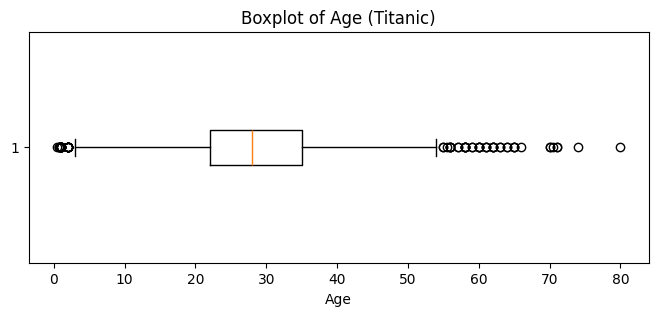

In [12]:
# Boxplot for age (matplotlib)
plt.figure(figsize=(8,3))
plt.boxplot(titanic_clean['age'].dropna(), vert=False)
plt.title('Boxplot of Age (Titanic)')
plt.xlabel('Age')
plt.show()

## 3) Scaling — Min-Max and Standardization

In [13]:
num_features = titanic_clean[['age','fare']].copy()
minmax = MinMaxScaler(); std = StandardScaler()
num_minmax = minmax.fit_transform(num_features)
num_std = std.fit_transform(num_features)
pd.DataFrame(num_minmax, columns=['age_minmax','fare_minmax']).head()

,age_minmax,fare_minmax
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


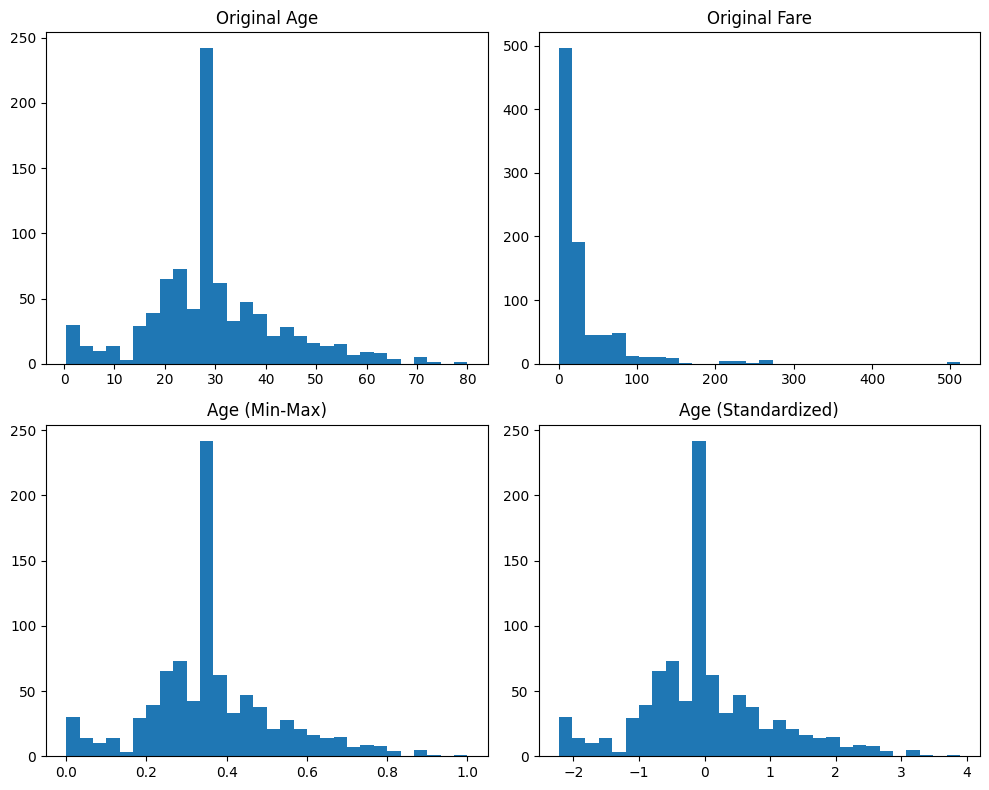

In [14]:
# Histograms (matplotlib)
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs = axs.ravel()
axs[0].hist(num_features['age'].dropna(), bins=30); axs[0].set_title('Original Age')
axs[1].hist(num_features['fare'].dropna(), bins=30); axs[1].set_title('Original Fare')
axs[2].hist(num_minmax[:,0], bins=30); axs[2].set_title('Age (Min-Max)')
axs[3].hist(num_std[:,0], bins=30); axs[3].set_title('Age (Standardized)')
plt.tight_layout()
plt.show()

## 4) Encoding categorical data

In [15]:
cat_features = titanic_clean[['sex','class','embarked']].copy()
class_ohe = pd.get_dummies(cat_features['class'], prefix='class')
embarked_ohe = pd.get_dummies(cat_features['embarked'], prefix='embarked')
le = LabelEncoder(); sex_le = le.fit_transform(cat_features['sex'])
encoded = pd.concat([pd.DataFrame({'sex_encoded':sex_le}), class_ohe, embarked_ohe], axis=1)
encoded.head()

,sex_encoded,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
0,1,False,False,True,False,False,True
1,0,True,False,False,True,False,False
2,0,False,False,True,False,False,True
3,0,True,False,False,False,False,True
4,1,False,False,True,False,False,True


## 5) Mini-challenge

In [16]:
# Remove rows where age is missing and compare sizes
orig = sns.load_dataset('titanic')
before = orig.shape[0]
after = orig.dropna(subset=['age']).shape[0]
removed = before - after
print('Original rows:', before)
print('After dropping missing age:', after)
print('Removed rows:', removed)

Original rows: 891
After dropping missing age: 714
Removed rows: 177


In [17]:
# Create family_size and analyze survival
t = titanic_clean.copy()
t['family_size'] = t['sibsp'].fillna(0).astype(int) + t['parch'].fillna(0).astype(int) + 1
survival_by_family = t.groupby('family_size')['survived'].agg(['count','mean']).rename(columns={'mean':'survival_rate'})
survival_by_family.head(12)

,count,survival_rate
family_size,,
1,537,0.303538
2,161,0.552795
3,102,0.578431
4,29,0.724138
5,15,0.200000
6,22,0.136364
7,12,0.333333
8,6,0.000000
11,7,0.000000


In [18]:
# One-hot encode embarked
pd.get_dummies(titanic_clean['embarked'], prefix='embarked').head()

,embarked_C,embarked_Q,embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
